# Feuille de travaux pratiques. Méthodes directes de résolution des systèmes linéaires

In [3]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (factorisation LU)
On rappelle que le procédé d'élimination de Gauss sans échange, lorsqu'il est applicable à une matrice réelle carrée inversible $A$, s'interprète comme un procédé de factorisation de $A$ sous la forme d'un produit $LU$, où la matrice $L$ est triangulaire inférieure, à éléments diagonaux tous égaux à $1$ et la matrice $U$ est triangulaire supérieure.

**1.** En se servant des formules vues en cours, écrire une fonction `LU`, prenant en argument un tableau contenant la matrice $A$ et retournant les matrices $L$ et $U$ de la factorisation $A=LU$, toutes deux stockées dans un tableau de même taille que celui contenant $A$. On rappelle que les éléments diagonaux de la matrice $L$ étant connus a priori, il n'est pas utile de les stocker.

**2.** Utiliser cette fonction pour calculer la décomposition LU de la matrice
$$
A=
\begin{pmatrix}1&4&7\\2&5&8\\3&6&10\\
\end{pmatrix}.
$$

In [4]:
A=np.array([[1.,4.,7.],[2.,5.,8.],[3.,6.,10.]])

**3.** Utiliser cette factorisation pour résoudre le système linéaire $Ax=b$ avec $b=(1,1,1)^\top$. Vérifier que le résultat obtenu est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [5]:
b=np.array([1.,1.,1.])

On considère à présent la version du procédé utilisant une stratégie de choix de pivot partiel, ce qui implique de possibles échanges de lignes lors de la factorisation.

**4.** Écrire une fonction `LUP`, prenant en argument un tableau contenant la matrice $A$ et retournant les matrices $P$, $L$ et $U$ de la factorisation $PA=LU$ correspondant à l'utilisation d'une stratégie de choix de pivot partiel. Comme précédemment, les matrices $L$ et $U$ seront toutes deux stockées dans un tableau de même taille que celui contenant $A$, et la matrice de permutation $P$ sera stockées sous la forme d'un tableau indiquant la position des lignes de $A$ dans la matrice $PA$.

**5.** Utiliser cette fonction pour la résolution du système linéaire $Ax=b$, avec
$$
A=\begin{pmatrix}3&17&10\\2&4&-2\\6&18&-12\end{pmatrix}\text{ et }b=\begin{pmatrix}1\\2\\3\end{pmatrix}.
$$
Vérifier que le résultat trouvé est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [6]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])

## Exercice 2 (factorisation QR)
La [factorisation QR](https://en.wikipedia.org/wiki/QR_decomposition) est un procédé permettant d'écrire une matrice réelle $A$ sous la forme d'un produit de la forme $A=QR$, dans lequel $Q$ est une matrice orthogonale et $R$ est une matrice triangulaire supérieure. Elle s'applique aussi bien à des matrice réelles carrées que rectangulaires.

On se propose dans cet exercice de mettre en &oelig;uvre la factorisation QR de deux manières distinctes pour des matrices réelles carrées inversibles.

Une première interprétation de la factorisation repose sur le [procédé d'orthonormalisation de Gram-Schmidt](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). Les colonnes de la matrice orthogonale $Q$ sont les vecteurs orthonormés obtenus à l'issue de l'application du procédé à la famille des colonnes de la matrice $A$, les coefficients des colonnes de la matrice triangulaire supérieure $R$ correspondant alors aux coefficients respectifs des colonnes de $A$ écrites dans la base orthonormées par les colonnes de $Q$ (ceux-ci sont des quantités calculées par l'algorithme du procédé de Gram-Schmidt).

**1.** En s'inspirant de l'algorithme du procédé d'orthonormalisation Gram-Schmidt modifié mis en &oelig;uvre dans une précédente feuille, écrire une fonction `QR_gramschmidt` retournant la factorisation QR d'une matrice carrée inversible obtenue par application du procédé de Gram-Schmidt.

**2.** Utiliser cette fonction pour résoudre le dernier système linéaire de l'exercice précédent. On pourra vérifier que le résultat trouvé est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [7]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])

Même sous sa forme modifiée, le procédé d'orthonormalisation de Gram-Schmidt reste numériquement instable. On lui préfère pour cette raison des méthodes reposant sur des isométries vectorielles pour la mise en &oelig;uvre de la factorisation QR d'une matrice réelle. L'utilisation des [réflexions de Householder](https://en.wikipedia.org/wiki/Householder_transformation) est l'une de ces méthodes (une seconde possibilité est de se servir des [rotations de Givens](https://en.wikipedia.org/wiki/Givens_rotation)).

Étant donné un vecteur $\vec{v}$ de l'espace $\mathbb{R}^n$, la transformation de Householder associée au vecteur $\vec{v}$ est la symétrie orthogonale par rapport à l'hyperplan orthogonal à $\vec{v}$. Si la matrice colonne $v$ represente le vecteur $\vec{v}$ dans la base canonique de l'espace, la matrice $H_v$ de la transformation dans la base canonique est donnée par
$$
H_v=I_n-\frac{2}{v^\top v}vv^\top.
$$

**3.** Écrire une fonction `householder` ayant comme argument d'entrée un tableau contenant la matrice colonne $v$ représentant un vecteur $\vec{v}$ dans la base canonique et renvoyant la matrice $H_v$ de la transformation de Householder associée dans la base canonique.

La factorisation QR d'une matrice $A$ peut alors être obtenue de la manière suivante. On crée une suite de matrices $A^{(k)}$, $k=0,\dots,n-1$, en posant $A^{(0)}=A$ et en appliquant successivement des réflexions de Householder successives de manière à éliminer les coefficients situés sous la diagonale pour finalement obtenir la matrice $R=A^{(n-1)}$. Pour fabriquer la transformation de Householder annulant les coefficients sous-diagonaux de la $k+1$<sup>e</sup> colonne de la matrice courante $A^{(k)}$, $k=0,\dots,n-2$, on utilise le vecteur $\vec{v}^{(k+1)}$, dont les $k$ premières coordonnées sont nulles, la $k+1$<sup>e</sup> coordonnée vaut
$$
a^{(k)}_{k+1k+1}+\text{sign}(a^{(k)}_{k+1k+1})\|a^{(k)}_{k+1}\|_2
$$
où $\text{sign}(a^{(k)}_{k+1k+1})$ est le signe du coefficient $a^{(k)}_{k+1k+1}$ et $\|a^{(k)}_{k+1}\|_2$ est la norme euclidienne du vecteur de $\mathbb{R}^{n-k}$ ayant pour coordonnées $a^{(k)}_{i+k\,k+1}$, $i=1,\dots,n-k$, et dont les $n-k-1$ dernières valent respectivement $a^{(k)}_{ik}$, $i=k+2,\dots,n$.

La matrice $Q$ est alors obtenue en multipliant par la droite la matrice identité par les matrices des transformations de Householder successivement utilisées.

**4.** Écrire une fonction `QR_householder` retournant la factorisation QR d'une matrice carrée inversible obtenue par application de réflexions de Householder.

**5.** Utiliser cette nouvelle fonction pour résoudre le système linéaire précédent.

In [8]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])

## Exercice bonus (erreurs d'arrondi et conditionnement)
On veut dans cet exercice mettre en évidence les problèmes, liés à la présence d'erreurs d'arrondi dans les calculs, apparaissant lors de la résolution numérique de certains systèmes linéaires. On va pour cela considérer la famille des [matrices de Hilbert](https://en.wikipedia.org/wiki/Hilbert_matrix). Avec la bibliothèque SciPy, la matrice de Hilbert $H$ d'ordre $n$ est obtenue en entrant la commande `linalg.hilbert(n)`.

**1.** Poser $n=10$ et choisir un vecteur non nul $x$ de $R^n$ (par exemple le vecteur dont toutes les composantes sont égales à $1$). Calculer ensuite le vecteur $b=Hx$.

In [9]:
from scipy import linalg

n = 10
x = np.ones(n)
H = linalg.hilbert(n)
b = np.dot(H,x)

# Affichage de b
print(b)


[2.92896825 2.01987734 1.60321068 1.34680042 1.16822899 1.03489566
 0.93072899 0.84669538 0.77725094 0.7187714 ]


**2.** Résoudre alors numériquement le système $Hx=b$ en utilisant la commande `solve`. Que constate-t-on ? En notant $\hat{x}$ la solution calculée, comparer précisément $\hat{x}$ avec $x$ en calculant l'erreur relative
$$
\frac{\|\hat{x}-x\|_2}{\|x\|_2}.
$$ 

In [10]:
# Résolution numérique de Hx = b
xh = np.linalg.solve(H,b)
print('Solution numérique :', xh, '\n')
print('Error relative :', np.linalg.norm(xh - x)/np.linalg.norm(x))

# Remarque : L'erreur relative est grande en regard de la précision macgine

Solution numérique : [1.         0.9999998  1.00000424 0.99996169 1.0001819  0.9995019
 1.00081456 0.99921504 1.00041109 0.99990979] 

Error relative : 0.0004170709495986796


**3.** L'erreur relative dépend-elle fortement du choix du second membre du système linéaire ?

In [11]:
n = 10
H = linalg.hilbert(n)
for i in range(n):
    x = np.random.rand(n)
    b = np.dot(H,x)
    xh = np.linalg.solve(H,b)
    print('Erreur relative :', np.linalg.norm(xh - x)/np.linalg.norm(x))

# Remarque : Le choix du second membre n'a pas trop d'influence sur l'erreur relative

Erreur relative : 0.0002886556804071061
Erreur relative : 0.00014832050112724584
Erreur relative : 0.0001015384025846201
Erreur relative : 7.25089893436104e-05
Erreur relative : 0.000117332447337604
Erreur relative : 2.7582660382624887e-05
Erreur relative : 0.00029204521599852305
Erreur relative : 1.8963428883398367e-05
Erreur relative : 7.886523896024319e-05
Erreur relative : 0.000172959192205979


**4.** Tracer le graphe, en utilisant une échelle logarithmique pour l'axe des ordonnées, de l'erreur relative en fonction de l'ordre $n$ de la matrice de Hilbert pour la solution dont toutes les composantes sont égales à 1. Tracer sur la même figure le graphe du [conditionnement](https://fr.wikipedia.org/wiki/Conditionnement_%28analyse_num%C3%A9rique%29#Conditionnement_d'une_matrice) en norme $\|\cdot\|_2$ de la matrice, obtenu au moyen de la commande `linalg.cond(.,2)` de NumPy, en fonction de son ordre. Que peut-on remarquer ? 

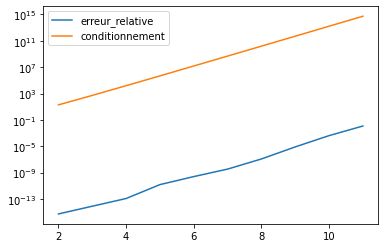

In [12]:
n = 10
err_relative, conditionnement = np.zeros(n), np.zeros(n)
i = 0
for j in range(2, n+2):
    x = np.ones(j)
    H = linalg.hilbert(j)
    conditionnement[i] = np.linalg.cond(H,2)
    b = np.dot(H,x)
    xh = np.linalg.solve(H,b)
    err_relative[i] = np.linalg.norm(xh-x,2) / np.linalg.norm(x,2)
    i = i+1

# Graphes
plt.semilogy(np.arange(2,n+2), err_relative, label='erreur_relative')
plt.semilogy(np.arange(2,n+2), conditionnement, label='conditionnement')
plt.legend()